# Libraries

In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

You should consider upgrading via the 'c:\users\hksci\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import gym
import gym_anytrading
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\hksci\anaconda3\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [27]:
df = pd.read_csv('data/aapl.csv')

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [29]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-16,148.46,149.76,145.88,146.39,"93,251,430"
2021-07-15,149.24,150.00,147.09,148.48,"106,820,305"
2021-07-14,148.10,149.57,147.68,149.15,"127,050,797"
2021-07-13,144.03,147.46,143.63,145.64,"100,827,102"
2021-07-12,146.21,146.32,144.00,144.50,"76,299,719"


In [30]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,300), window_size=5)
env.signal_features

array([[ 1.4639e+02,  0.0000e+00],
       [ 1.4848e+02,  2.0900e+00],
       [ 1.4915e+02,  6.7000e-01],
       [ 1.4564e+02, -3.5100e+00],
       [ 1.4450e+02, -1.1400e+00],
       [ 1.4511e+02,  6.1000e-01],
       [ 1.4324e+02, -1.8700e+00],
       [ 1.4457e+02,  1.3300e+00],
       [ 1.4202e+02, -2.5500e+00],
       [ 1.3996e+02, -2.0600e+00],
       [ 1.3727e+02, -2.6900e+00],
       [ 1.3696e+02, -3.1000e-01],
       [ 1.3633e+02, -6.3000e-01],
       [ 1.3478e+02, -1.5500e+00],
       [ 1.3311e+02, -1.6700e+00],
       [ 1.3341e+02,  3.0000e-01],
       [ 1.3370e+02,  2.9000e-01],
       [ 1.3398e+02,  2.8000e-01],
       [ 1.3230e+02, -1.6800e+00],
       [ 1.3046e+02, -1.8400e+00],
       [ 1.3179e+02,  1.3300e+00],
       [ 1.3015e+02, -1.6400e+00],
       [ 1.2964e+02, -5.1000e-01],
       [ 1.3048e+02,  8.4000e-01],
       [ 1.2735e+02, -3.1300e+00],
       [ 1.2611e+02, -1.2400e+00],
       [ 1.2713e+02,  1.0200e+00],
       [ 1.2674e+02, -3.9000e-01],
       [ 1.2590e+02,

# Building Environment

info {'total_reward': -17.680000000000078, 'total_profit': 0.34323172923838974, 'position': 1}


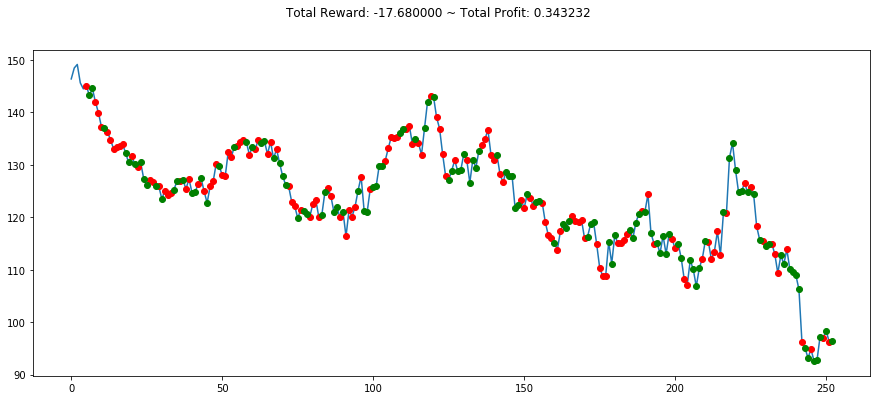

In [12]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Build Environment and Train

In [13]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [14]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -320     |
| fps                | 25       |
| nupdates           | 1        |
| policy_entropy     | 0.69     |
| total_timesteps    | 5        |
| value_loss         | 0.000272 |
---------------------------------
---------------------------------
| explained_variance | -0.0059  |
| fps                | 570      |
| nupdates           | 100      |
| policy_entropy     | 0.688    |
| total_timesteps    | 500      |
| value_loss         | 0.6      |
---------------------------------
---------------------------------
| explained_variance | -0.00802 |
| fps                | 660     

# Evaluation

In [25]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,210), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 18.63000000000001, 'total_profit': 0.9409747192807802, 'position': 1}


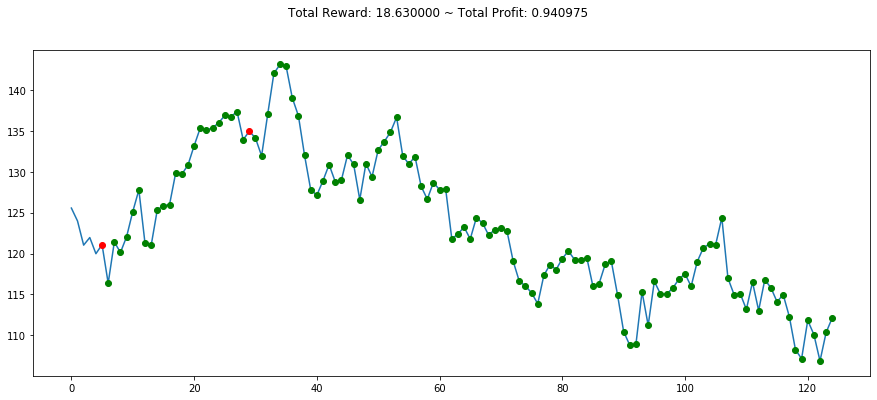

In [26]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()